<a href="https://colab.research.google.com/github/deepikagoel1/Edufabrica-aiml/blob/main/Titanic_minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Titanic Data Set

In [752]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [753]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [754]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [755]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [757]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We should 1st check whether Null values are present in the DataSet or not, before performing any cleaning on that particular column. Here age has null values,so we should fix it.

In [758]:
df['age'] = df['age'].fillna(value=df['age'].mean())

In [759]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Checking for Outliers in the DataSet

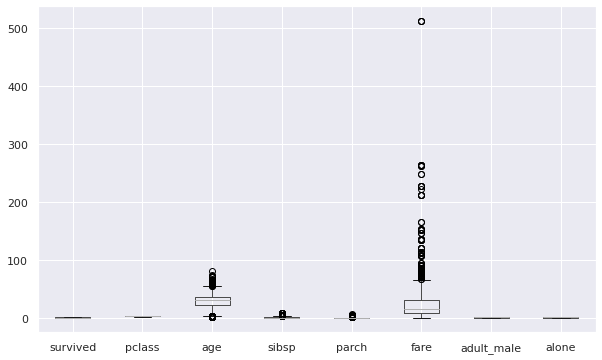

In [760]:
plt.figure(figsize=(10, 6))
df.boxplot()

Outliers are present in four different columns,two of those columns are ignorable,'Age','Fare' Column Outliers should be Fixed.

In [761]:
IQR_Fare = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
IQR_Fare

23.0896

In [762]:
Upper_OutlierLimit = df['fare'].quantile(0.75)+1.5*IQR_Fare
Upper_OutlierLimit

65.6344

In [763]:
OutlierValues = df[(df['fare']>Upper_OutlierLimit)]
OutlierValues

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,29.699118,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


In [764]:
df['fare']=np.where(df['fare']>65.6,df['fare'].quantile(0.85),df['fare'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,56.4958,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [765]:
IQR_Age = df['age'].quantile(0.75) - df['age'].quantile(0.25)
IQR_Age

13.0

In [766]:
Upper_OutlierLimit2 = df['age'].quantile(0.75)+1.5*IQR_Age
Upper_OutlierLimit2

54.5

In [767]:
OutlierValues2 = df[(df['age'] > Upper_OutlierLimit2)]
OutlierValues2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
174,0,1,male,56.0,0,0,30.6958,C,First,man,True,A,Cherbourg,no,True


In [768]:
df['age']=np.where(df['age']>54.5,df['age'].quantile(0.95),df['age'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,56.4958,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


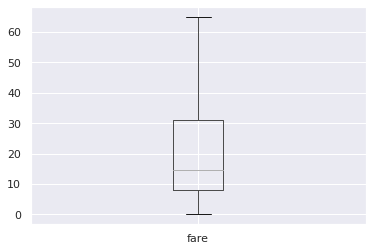

In [769]:
df.boxplot(column=['fare'])


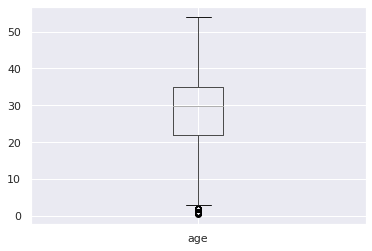

In [770]:
df.boxplot(column=['age'])

In [771]:
obj = df.dtypes == np.object
print(obj)

survived       False
pclass         False
sex             True
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who             True
adult_male     False
deck           False
embark_town     True
alive           True
alone          False
dtype: bool


In [772]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [773]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.067470,-0.035322,0.081629,0.317899,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.329164,0.083081,0.018443,-0.716815,0.094035,0.135207
age,-0.067470,-0.329164,1.000000,-0.239933,-0.188730,0.132956,0.256601,0.182122
sibsp,-0.035322,0.083081,-0.239933,1.000000,0.414838,0.340400,-0.253586,-0.584471
parch,0.081629,0.018443,-0.188730,0.414838,1.000000,0.307713,-0.349943,-0.583398
fare,0.317899,-0.716815,0.132956,0.340400,0.307713,1.000000,-0.260050,-0.470751
adult_male,-0.557080,0.094035,0.256601,-0.253586,-0.349943,-0.260050,1.000000,0.404744
alone,-0.203367,0.135207,0.182122,-0.584471,-0.583398,-0.470751,0.404744,1.000000


### HEATMAP

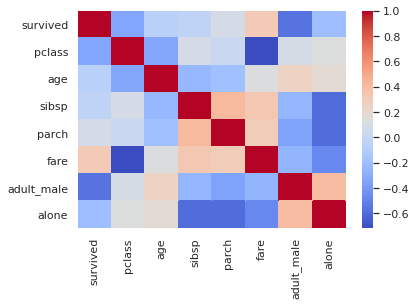

In [775]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

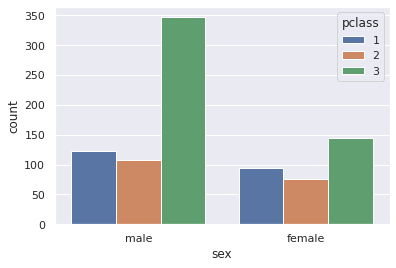

In [776]:
sns.countplot(x = 'sex', hue = 'pclass' ,  data = df)

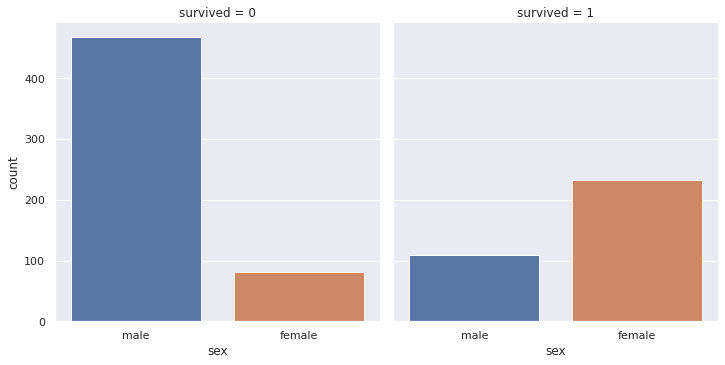

In [777]:
sns.catplot(x='sex', col='survived', kind='count', data= df)

In [ ]:
sns.pairplot(df, kind= 'reg', diag_kind= 'kde', palette= 'Wistia', hue= 'sex')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


### Data Cleaning

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
def drawPieChart(labels,
                 count,
                 title=' '):

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    _, ax1 = plt.subplots()
    ax1.set_title(title)
    explode = [0.1 for i in labels]
    ax1.pie(count, labels=labels,
            autopct=lambda perc: f'{perc:.2f}% ({int(perc * sum(count)/100)})',
            shadow=True, explode=explode,
            pctdistance=0.7, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis('equal')

    plt.show()


def getFrequenciesInCategoricalColumn(dataframe, columnName):
    labels = dataframe[columnName].unique()
    # print(f'Antes: {labels}, {list(map(lambda x: x is np.nan,labels))}')
    labels = sorted(labels, key=lambda x: '0' if x is np.nan else x)
    # print(labels)

    def sumatoryFunction(columnContent):
        if columnContent is np.nan:
            return sum(dataframe[columnName].isnull())
        return sum(dataframe[columnName] == columnContent)

    count = list(map(sumatoryFunction,
                     labels))
    return labels, count

In [ ]:
# Separate the data into two subsets to see if there is some difference in distr
# from survived to non survived

survivedSubset = df[df['survived'] == 1]
notSurvivedSubset = df[df['survived'] == 0]

totalSurvived = len(survivedSubset)
totalNotSurvived = len(notSurvivedSubset)

print(
    f'Total Survived: {totalSurvived}\nTotal Not Survived: {totalNotSurvived}')
print(f'Ratio NS/S: {totalNotSurvived / totalSurvived :.2f}')

In [ ]:
for column in df.columns.values:
    hasMissingValues = df[column].isnull().values.any()
    if hasMissingValues:
        print(f'Column: {column} has missing values')

In [ ]:
columnName = 'survived'
labels, count = getFrequenciesInCategoricalColumn(df, columnName)
drawPieChart(labels, count, columnName)

In [ ]:
columnName = 'embarked'
labels, count = getFrequenciesInCategoricalColumn(df, columnName)
drawPieChart(labels, count, columnName)

In [ ]:
columnName = 'survived'
datasetFemale = df[df['sex'] == 'female']
datasetMale = df[df['sex'] == 'male']

labelsFemale, countFemale = getFrequenciesInCategoricalColumn(
    datasetFemale, columnName)
labelsFemale = list(
    map(lambda x: 'Female Survived' if x else 'Female Not Survived', labelsFemale))

labelsMale, countMale = getFrequenciesInCategoricalColumn(
    datasetMale, columnName)
labelsMale = list(
    map(lambda x: 'Male Survived' if x else 'Male Not Survived', labelsMale))

drawPieChart(list(labelsFemale) + list(labelsMale),
             countFemale + countMale, columnName)

In [ ]:
# Does the gender influences on surviability?

fig, ax = plt.subplots()

width = 0.7
ind = np.arange(2)    # the x locations for the groups

p1 = ax.bar(ind, countMale, width, label='Men')
p2 = ax.bar(ind, countFemale, width,
            bottom=countMale, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Quantity')
ax.set_title('Gender Surviability')
ax.set_xticks(ind)
ax.set_xticklabels(('Not Survived', 'Survived'))
ax.legend()

plt.show()

In [ ]:
# Lets look at some histograms to see if something  appears looking at the fare

bins = np.linspace(0, 100, 10)

# plt.hist(survivedSubset['Age'].dropna(axis=0).values,
#          bins, alpha=0.5, label='Survived')
plt.hist([notSurvivedSubset['age'].dropna(axis=0).values,
          survivedSubset['age'].dropna(axis=0).values],
         bins,
         alpha=0.5,
         histtype='barstacked',
         stacked=True,
         label=['Not Survived', 'Survived'])
plt.legend(loc='upper right')
plt.ylabel('No. People')
plt.xlabel('Age')
plt.show()

histogramMin = min(df['fare'].values)
histogramMax = max(df['fare'].values)

bins = np.linspace(histogramMin, histogramMax, 10)
# plt.hist(survivedSubset['Fare'].dropna(axis=0).values,
#          bins, alpha=0.5, label='Survived',
#          histtype='barstacked')
plt.hist([notSurvivedSubset['fare'].dropna(axis=0).values,
          survivedSubset['fare'].dropna(axis=0).values],
         bins,
         alpha=0.5,
         label=['Not Survived', 'Survived'],
         histtype='barstacked',
         stacked=True)
plt.legend(loc='upper right')
plt.ylabel('Nº People')
plt.xlabel('Fare')
plt.show()


In [ ]:
# Lets see if there is a difference in surviability given different classes

fig, ax = plt.subplots()

width = 0.7
ind = np.arange(3)    # the x locations for the groups

survivedClass = list(
    map(lambda x: sum(survivedSubset['pclass'] == x), [1, 2, 3]))
notSurvivedClass = list(
    map(lambda x: sum(notSurvivedSubset['pclass'] == x), [1, 2, 3]))

p1 = ax.bar(ind, survivedClass, width, label='Survived')
p2 = ax.bar(ind, notSurvivedClass, width,
            bottom=survivedClass, label='Not Survived')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Quantity')
ax.set_title('pClass Surviability')
ax.set_xticks(ind)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
# To create the percentage labels whe use list comprehension
# in a zipped list to compute the percentage of survivors
labelsSurvived = [
    round((perc[0]/sum(perc))*100, 2) for perc in zip(survivedClass, notSurvivedClass)]
# the percentage not survived is 100 - percentage survived
labelsNotSurvived = list(map(lambda x: f'{100 - x:.2f}%', labelsSurvived))
# converts to string
labelsSurvived = list(map(lambda x: f'{x}%', labelsSurvived))


plt.show()

In [ ]:
datasetAges = df.dropna(axis=0, subset=['age'])
datasetAges = datasetAges.assign(AgeGroup=datasetAges['age'].apply(
    lambda x: x // 10 if x // 10 <= 6 else 6))
# There is a trick here, since Survived is a boolean attribute
# the Survived mean is the same as Rate of Survival (do the math smarty pants!)
ageGroup = datasetAges.groupby(['AgeGroup']).aggregate([np.mean, np.var])

In [ ]:
fig, ax = plt.subplots()
survivedRatio = ageGroup['survived']['mean'].values
ax.scatter(ageGroup.index.values,
           survivedRatio)
ax.set_xticks(ageGroup.index.values)

ax.set_title('Surviability by Age Group')
ax.set_ylim((0, 1))
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Age Group')

ax.set_xticklabels(['0 - 10', '10 - 20', '20 - 30',
                   '30 - 40', '40 - 50', '50 -60', '60+'])
for i in range(len(survivedRatio)):
    xyAnnotation = list(zip(ageGroup.index.values, survivedRatio))
# The magic number 0.03 serves as a offset so the annotation wont
# be in the same place of the dot in the graph
    xyAnnotationPlace = list(
        map(lambda x: (x[0]+0.03, x[1]+0.03), xyAnnotation))
    ax.annotate(f'{survivedRatio[i]*100:.2f}%',
                xy=xyAnnotation[i],
                xytext=xyAnnotationPlace[i])
# (ageGroup['Survived']['mean'].values)

fig.show()

In [ ]:
# Lets see the distributions between survived and not survived
# we will use both boxplot and violin plot to see the pros and cons
# in each of them.
# TLDR: Violin shows the distr whereas boxplot only shows quartiles.

labels = ['survived', 'not survived']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# rectangular box plot
bplot1 = ax1.boxplot([survivedSubset['age'].dropna(axis=0).values,
                      notSurvivedSubset['age'].dropna(axis=0).values],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

bplot2 = ax2.violinplot([survivedSubset['age'].dropna(axis=0).values,
                         notSurvivedSubset['age'].dropna(axis=0).values])
ax2.set_title('Violin plot')

ax2.set_xticks([1, 2])
ax2.set_xticklabels(labels)

# fill with colors
colors = ['pink', 'lightblue']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xlabel('survived')
ax1.set_ylabel('age')

plt.show()


In [ ]:
#Selection of Categorical and Numerical Variables:

def grab_col_names(dataframe, cat_th=5, car_th=20):
    """
    This function to perform the selection of numeric and categorical variables in the data set in a parametric way.
    Note: Variables with numeric data type but with categorical properties are included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        The data set in which Variable types need to be parsed
    cat_th: int, optional
        The threshold value for number of distinct observations in numerical variables with categorical properties.
        cat_th is used to specify that if number of distinct observations in numerical variable is less than
        cat_th, this variables can be categorized as a categorical variable.

    car_th: int, optional
        The threshold value for categorical variables with  a wide range of cardinality.
        If the number of distinct observations in a categorical variables is greater than car_th, this
        variable can be categorized as a categorical variable.

    Returns
    -------
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of categorical variables with  a wide range of cardinality.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        Sum of elements in lists the cat_cols,num_cols  and  cat_but_car give the total number of variables in dataframe.
    """

    # cat cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col.upper()]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols,num_cols,cat_but_car


In [ ]:
grab_col_names(df)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
 # General Exploration for Categorical Variables:

def cat_summary(dataframe, plot=False):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette=rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

In [ ]:

cat_summary(df, plot=True)

In [ ]:
# General Exploration for Numerical Variables:

def num_summary(dataframe,  plot=False):
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in num_cols:
        print("########## Summary Statistics of " +  col_name + " ############")
        print(dataframe[col_name].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name  )
            plt.xlabel(col_name)
            plt.title("The distribution of "+ col_name)
            plt.grid(True)
            plt.show(block=True)

In [ ]:
num_summary(df, plot=True)

### predictors

In [ ]:
columnName = 'sex'
labels, count = getFrequenciesInCategoricalColumn(df, columnName)
drawPieChart(labels, count, columnName)

In [ ]:
df.columns.values[1:]

In [ ]:
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
df.head()

### dummies

In [ ]:
sex = pd.get_dummies(df['sex'], drop_first = True)
sex[:2]

In [ ]:
embark = pd.get_dummies(df['embarked'], drop_first=True)
embark[:2]

In [ ]:
Class = pd.get_dummies(df['pclass'], drop_first=True)
Class[:2]

### concat

In [ ]:
df = pd.concat([df, sex, embark, Class], axis = 1)

In [ ]:
df.head()

In [ ]:
df.drop(['sex','pclass','embarked'], axis = 1, inplace = True)

In [ ]:
df.shape

In [ ]:
titanic_train = df
titanic_train.head()

### Training and testing 

In [ ]:
X = titanic_train.drop('survived', axis = 1)
y = titanic_train['survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
log_model = LogisticRegression(max_iter = 5000)

### fit the value

In [ ]:
log_model.fit(X_train, y_train)

### Predictions

In [ ]:
pred = log_model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
accuracy_score(y_test, pred)*100

In [ ]:
#ROC CURVE 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
AUC = logit_roc_auc = roc_auc_score(y_test, pred)

fpr ,tpr,thresholds= roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label ="AUC (area=%0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.savefig("Log_ROC")
plt.show();

In [ ]:
import math as mt

feature_importance = pd.DataFrame(X_train.columns, columns = ["feature"])
feature_importance["importance"] = pow(mt.e, log_model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
# Visualization 
ax = feature_importance.plot.barh(x='feature', y='importance', figsize=(12,12), fontsize=10)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

### Testing

Some helper functions
Lets define two auxiliary functions to help us plot some pie charts to see how are the how many observations on the dataset are categorized according to the attributes Sex and Embarked as well as the Survived target.

In [ ]:
titanic_train.columns.values

In [ ]:
def predictor(age = 38.0 , sibsp = 1, parch = 0, fare = 71.2833, male = 0, Q = 0, S= 0, second = 0, third = 0 ):
    result = log_model.predict([[age, sibsp, parch, fare, male, Q, S, second, third]])
    if result == np.array([1]):
        print('Passenger Survived')
    else:
        print('Passenger Died')

In [ ]:
titanic_train = df
titanic_train.head()

In [ ]:
log_model.predict([[38.0, 1, 0, 71.23, 0, 0, 0, 0, 0]])

In [ ]:
predictor(23.0, 1, 0, 176.321, 0, 0, 1, 0, 1)

In [ ]:
data = np.arange(1, 11)
data

In [ ]:
np.random.shuffle(data)

In [ ]:
data

In [ ]:
train = data[:6]
test  = data[6:]
train, test